**Assignment 2 Set 6**

# **Deep Learning (S1-21_DSECLZG524) - DL Group 168 - SEC-3**

Group members: 


*   Ashwini BR - 2020fc04180@wilp.bits-pilani.ac.in
*   Ashutosh Kumar - 2020fc04341@wilp.bits-pilani.ac.in
*   Rahul Paul -2020fc04350@wilp.bits-pilani.ac.in


### **1. Import Libraries/Dataset (0 mark)** 

>1. Import the required libraries and the dataset (use Google Drive if required).
>2. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [ ]:
import os
import time
import progressbar
import matplotlib.pyplot as plt
import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1.keras.backend import set_session
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter 
from keras.preprocessing.image import load_img
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir_Flickr_jpg = "/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/Flicker8k_Dataset"
dir_Flickr_text = "/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/set_0.txt"
file_path = "/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/set_0.pkl"
jpgs = os.listdir(dir_Flickr_jpg)
print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))

Mounted at /content/drive
The number of jpg flies in Flicker8k: 8091


## **2. Data Processing(1  mark)**
 

Read the pickle file (https://drive.google.com/file/d/1pcFPrRGGk0kEzLXlfIDrAvRZbTBiVeET/view?usp=sharing) (Links to an external site.) and convert the data into the correct format which could be used for ML model. 
 Pickle file contains the image id and the text associated with the image.

Eg: '319847657_2c40e14113.jpg#0\tA girl in a purple shirt hold a pillow .

Each image can have multiple captions.

319847657_2c40e14113.jpg -> image name

0 -> Caption ID

\t  -> separator between Image name and Image Caption

A girl in a purple shirt hold a pillow . -> Image Caption

Corresponding image wrt image name can be found in the image dataset folder.

 

Image dataset Folder : https://drive.google.com/file/d/1-mPKMpphaKqtT26ZzbR5hCHGedkNyAf1/view?usp=sharing

 

Plot at least two samples and their captions (use matplotlib/seaborn/any other library). 
Bring the train and test data in the required format. 

In [ ]:
import pickle
objects = []
with (open(file_path, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
file1=open('/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/set_0.txt','w')
for items in objects[0]:
    file1.writelines(items+'\n')
file1.close()

In [ ]:
## loading as dataframe
def load_csv(directory):
    desc=dict()
    text = pd.read_csv(directory, delimiter='|',header=None,names=["filename","index","caption"])
    text = text.iloc[1:,:]
    df_new = text[text.iloc[:,2].notnull()]
    print(df_new.iloc[:5,:])
    return df_new  

In [ ]:
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()


datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])


uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())



The number of unique file names : 8037
The distribution of the number of captions for each image:


Counter({1: 556, 2: 1744, 3: 2745, 4: 2239, 5: 753})

In [ ]:
df_txt.head()

,filename,index,caption
0,318667317_108c402140.jpg,4,a man in a black hoodie be hold a paper sign .
1,2072574835_febf0c5fb9.jpg,4,three race dog be run out of the start gate on...
2,3083016677_5782bc337c.jpg,4,two motorcycle with two rider each .
3,95734038_2ab5783da7.jpg,0,a man on a bike nest to a river .
4,241346146_f27759296d.jpg,1,a football player try tackle another player wh...


Loading the image and associated 5 captions with the image


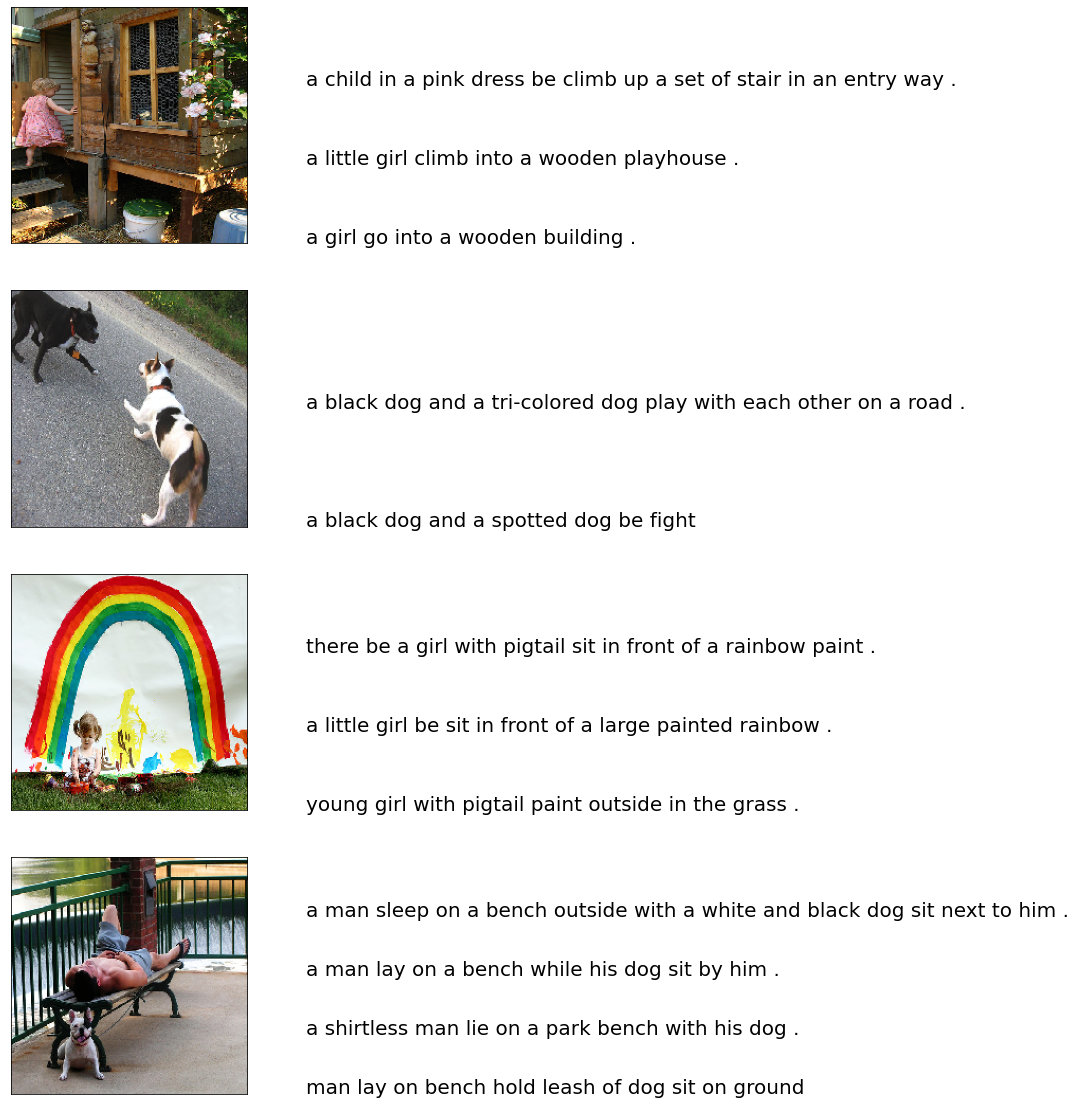

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

npic = 4  #no_of_images
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[:npic]:
    filename = dir_Flickr_jpg + '/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

**Data preparation**



In [ ]:
def df_word(df_txt):
    vocabulary = []
    for i in range(len(df_txt)):
        temp=df_txt.iloc[i,2]
        vocabulary.extend(temp.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(15)

Vocabulary Size: 5560


,word,count
0,a,42840
1,.,22578
2,in,11912
3,be,8210
4,on,6601
5,the,6557
6,dog,6266
7,and,5428
8,man,5175
9,with,4820


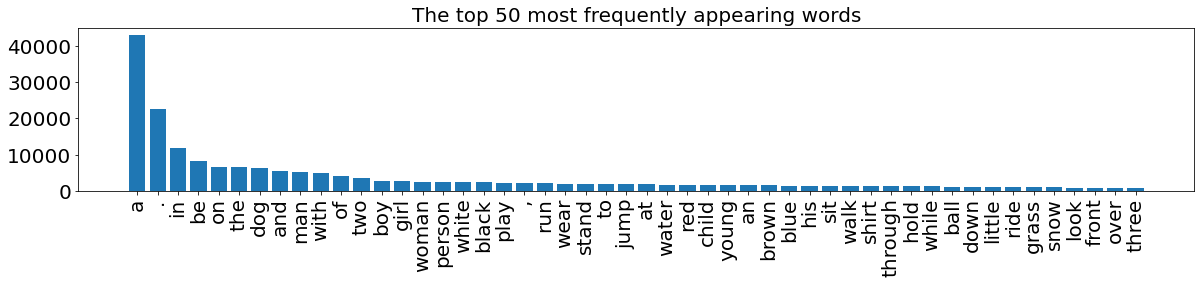

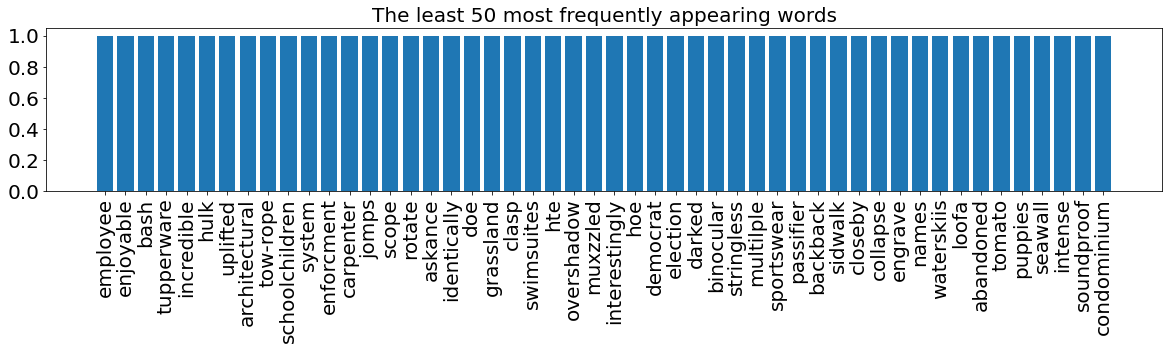

In [ ]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

Cleaning data

Cleaning data : removing redundancy

Single character - like 'a','I'

Numeric Values - 2 3 4

Punctuations and special characters - , ! # @**

Removing Stopwords

In [ ]:
import string
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)
from nltk.corpus import stopwords

def remove_stopwords(word_list):
        processed_word_list = ""
        for word in word_list.split():
            word = word.lower() # in case they arenet all lower cased
            if word not in stopwords.words("english"):
                processed_word_list+= " " +word
        return processed_word_list

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    text = remove_stopwords(text)
    return(text)

with progressbar.ProgressBar(max_value=len(df_txt.caption.values)) as bar:
    for i, caption in enumerate(df_txt.caption.values):
        newcaption = text_clean(caption)
        df_txt["caption"].iloc[i] = newcaption
        bar.update(i)
    

100% (25000 of 25000) |##################| Elapsed Time: 0:00:34 Time:  0:00:34


Vocabulary Size: 5391


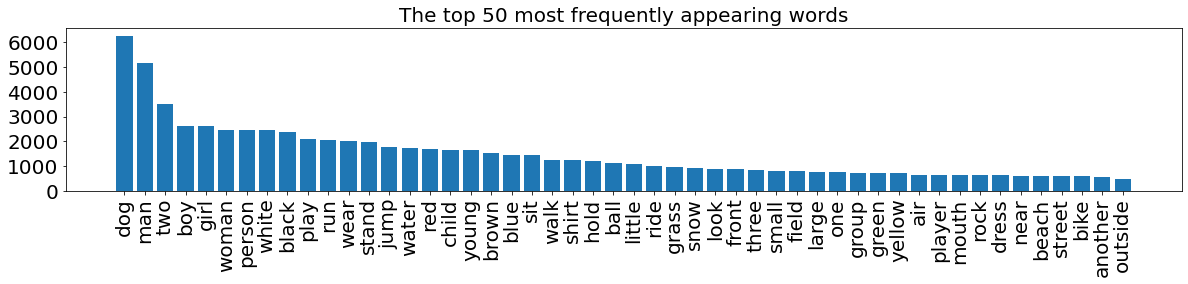

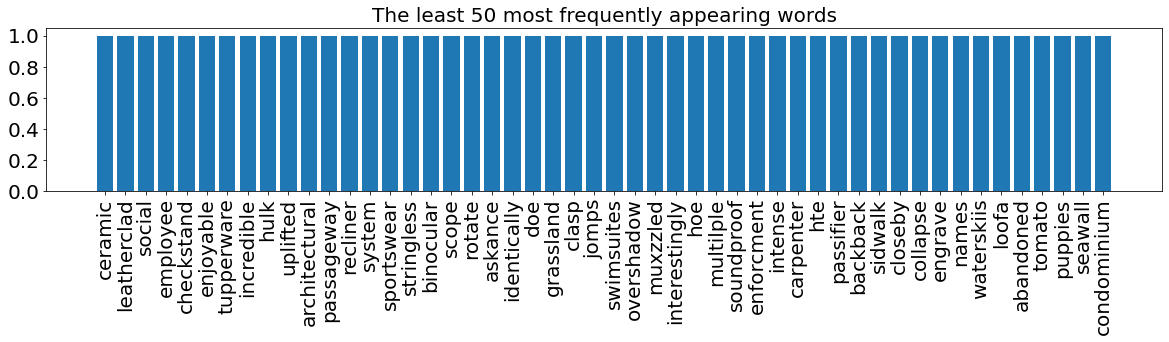

In [ ]:
dfword = df_word(df_txt)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

Adding startseq and endseq in all the captions

In [ ]:
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'
        caps.append(txt)
    return(caps)
df_txt0 = copy(df_txt)
df_txt0["caption"] = add_start_end_seq_token(df_txt["caption"])
df_txt0.head(5)
del df_txt


3. Model Building (4 mark) 
4. Use Pretrained VGG-16 model trained on ImageNet dataset (available publicly on google) for image feature extraction.
5. Create 3 layered RNN layer model and other relevant layers for image caption generation.
6. Add L2 regularization to all the RNN layers. 
7. Add one layer of dropout at the appropriate position and give reasons. 
8. Choose the appropriate activation function for all the layers. 
Print the model summary.

In [ ]:
from keras.applications.vgg16 import VGG16
modelvgg = VGG16(include_top=True, weights=None)
modelvgg.load_weights("/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/vgg16-pretrained-model/vgg16_weights_tf_dim_ordering_tf_kernels.h5")
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-1].output)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
with progressbar.ProgressBar(max_value=len(jpgs)) as bar:
    for i,name in enumerate(jpgs):
        # load an image from file
        filename = dir_Flickr_jpg + '/' + name
        image = load_img(filename, target_size=target_size)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        nimage = preprocess_input(image)
        y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
        images[name] = y_pred.flatten()
        bar.update(i)
    #print(i,filename)

100% (8091 of 8091) |####################| Elapsed Time: 0:10:27 Time:  0:10:27


In [ ]:
dimages, keepindex = [],[]
nd=(df_txt0["index"].values)
b = [(int(i)==0) for i in nd]
#for i in nd:
 #   print(int(i)==0)
#df_txt0 = df_txt0.loc[b,: ]
df_txt0 = df_txt0.loc[df_txt0["index"].values == "0",: ]

for i, fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt0["filename"].iloc[keepindex].values
dcaptions = df_txt0["caption"].iloc[keepindex].values
dimages = np.array(dimages)
print(df_txt0["index"][:5])

3     0
10    0
13    0
21    0
23    0
Name: index, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
## the maximum number of words in dictionary
count_words=22000
#nb_words = 31782
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:10])


vocabulary size : 2703
[[1, 4, 47, 1408, 259, 2], [1, 7, 21, 6, 96, 69, 457, 312, 97, 2], [1, 587, 196, 17, 815, 249, 101, 103, 2], [1, 89, 38, 174, 26, 2], [1, 149, 587, 196, 3, 15, 29, 85, 42, 2], [1, 20, 1409, 79, 234, 17, 2], [1, 4, 23, 588, 365, 25, 80, 7, 106, 168, 816, 2], [1, 9, 121, 175, 104, 15, 392, 2], [1, 20, 8, 24, 1014, 63, 2], [1, 393, 121, 817, 159, 130, 538, 2]]


**Spliting data into Training and Test data **

In [ ]:
prop_test, prop_val = 0.2,0.2

N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], 
           dtexts[Ntest:Ntest+Nval],  
           dtexts[Ntest+Nval:])

dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [ ]:
maxlen = np.max([len(text) for text in dtexts])

The final preprocessing so that the data can be used as input and output of the Keras model.

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)

            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)


Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)
# pre-processing is not necessary for testing data
#Xtext_test,  Ximage_test,  ytext_test  = preprocessing(dt_test,di_test)

# captions/images = 3010
 (21632, 20) (21632, 1000) (21632, 2703)
# captions/images = 1002
 (7202, 20) (7202, 1000) (7202, 2703)


Activation function for decoding = "relu"

Activation function for output = "softmax"

Loss Function used = "categorical_crossentropy"

Optimizer = "adam" & learning Rate = 0.01


In [ ]:
from keras import layers
from keras.regularizers import l2
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="RNN_Layer_1", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,dropout=0.2,name="RNN_Layer_2", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_3",kernel_regularizer=l2(0.01))(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)

model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

2703
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 20, 64)       172992      ['input_3[0][0]']                
                                                                                                  
 RNN_Layer_1 (LSTM)             (None, 20, 256)      328704      ['embedding[0][0]']              
                                                                                                  
 RNN_Layer_2 (LSTM)             (None, 20, 256)      525312      ['RNN_Layer_1[0][0]']            
                                                                                       

4. Model Compilation (0.5 mark) 
5. Compile the model with the appropriate loss function. 
6. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value. 
7. Model Training (1 mark) 
8. Train the model for an appropriate number of epochs. Print the train and validation loss for each epoch. Use the appropriate batch size. 
9. Plot the loss and accuracy history graphs for both train and validation set. 10. Print the total time taken for training. 
11. Model Evaluation (1 mark) 
 Take a random image from google and generate caption for that image.

In [ ]:
start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=50, verbose=2, 
                  batch_size=512,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))
                #callbacks = [cp_callback])
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))

Epoch 1/50
43/43 - 24s - loss: 10.8631 - accuracy: 0.1348 - val_loss: 6.7827 - val_accuracy: 0.1391 - 24s/epoch - 547ms/step
Epoch 2/50
43/43 - 11s - loss: 5.7892 - accuracy: 0.1658 - val_loss: 5.5335 - val_accuracy: 0.1711 - 11s/epoch - 258ms/step
Epoch 3/50
43/43 - 7s - loss: 5.2957 - accuracy: 0.1753 - val_loss: 5.4753 - val_accuracy: 0.1780 - 7s/epoch - 162ms/step
Epoch 4/50
43/43 - 7s - loss: 5.2118 - accuracy: 0.1784 - val_loss: 5.4701 - val_accuracy: 0.1811 - 7s/epoch - 163ms/step
Epoch 5/50
43/43 - 7s - loss: 5.1517 - accuracy: 0.1843 - val_loss: 5.4561 - val_accuracy: 0.1822 - 7s/epoch - 159ms/step
Epoch 6/50
43/43 - 7s - loss: 5.0848 - accuracy: 0.1890 - val_loss: 5.4510 - val_accuracy: 0.1877 - 7s/epoch - 160ms/step
Epoch 7/50
43/43 - 7s - loss: 5.0205 - accuracy: 0.1952 - val_loss: 5.4065 - val_accuracy: 0.1897 - 7s/epoch - 158ms/step
Epoch 8/50
43/43 - 7s - loss: 4.9572 - accuracy: 0.2009 - val_loss: 5.4145 - val_accuracy: 0.1962 - 7s/epoch - 160ms/step
Epoch 9/50
43/43 - 

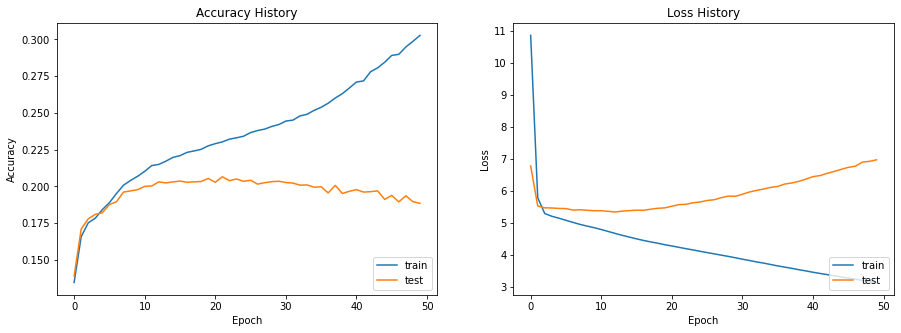

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend(loc="lower right")

plt.show()

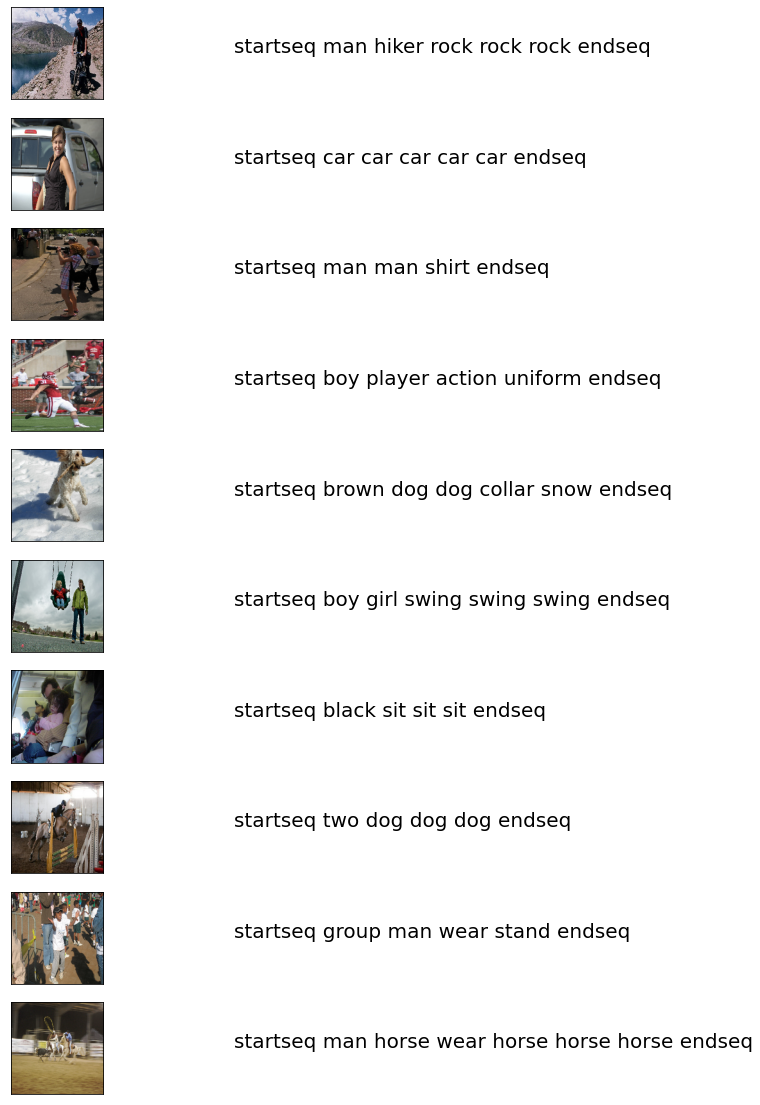

In [ ]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'

    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)



npic = 10
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm, image_feature in zip(fnm_test[:npic],di_test[:npic]):
    ## images 
    filename = dir_Flickr_jpg + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count += 1

plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])


nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
count = 0 
for jpgfnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] ## remove startreg, and endreg
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1]## remove startreg, and endreg
    
    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
    if bleu > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))

  19.96% is done..
  39.92% is done..
  59.88% is done..
  79.84% is done..
  99.80% is done..


Bad Caption


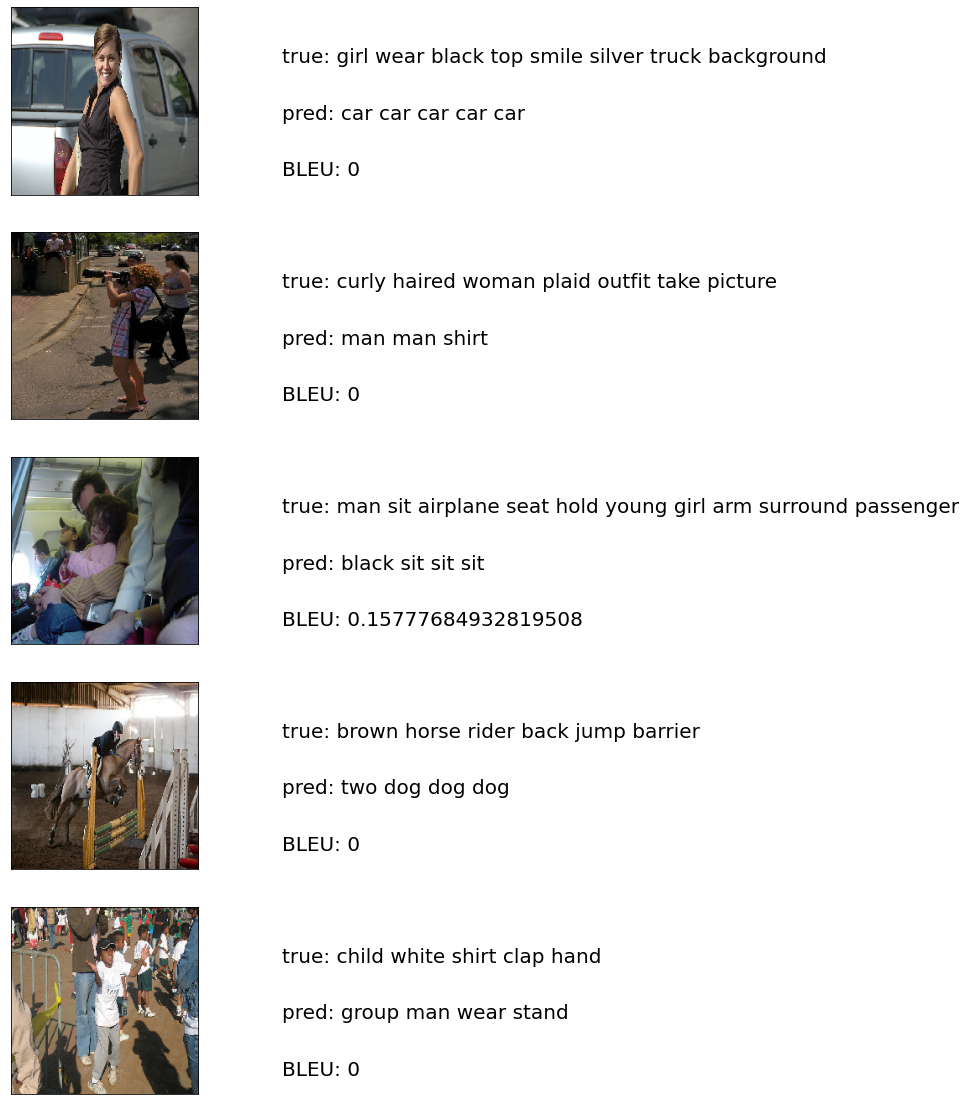

Good Caption


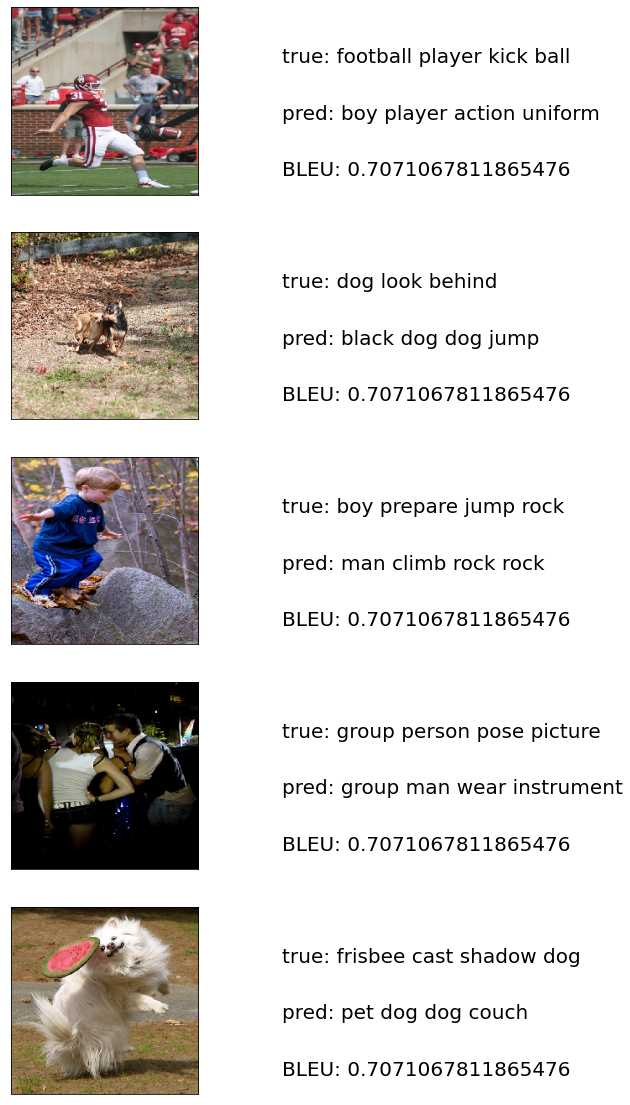

In [ ]:

def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        ## images 
        filename = dir_Flickr_jpg + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:" + caption_true,fontsize=20)
        ax.text(0,0.4,"pred:" + caption,fontsize=20)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=20)
        count += 1
    plt.show()

print("Bad Caption")
plot_images(pred_bad)
print("Good Caption")
plot_images(pred_good)
 

Text(0, 0.5, 'startseq man white shirt play water endseq')

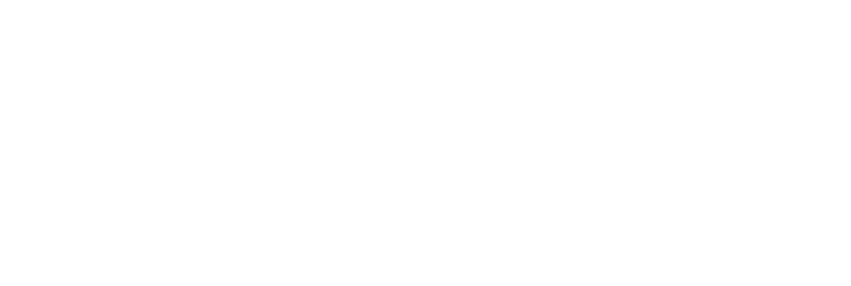

In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/Assgnmnt_2/DogMan.jpg"
image_load = load_img(filename, target_size=target_size)
ax = fig.add_subplot(1,2,1,xticks=[],yticks=[])
ax.imshow(image_load)
caption = predict_caption(image_feature.reshape(1,len(image_feature)))
ax = fig.add_subplot(npic,2,2)
plt.axis('off')
ax.plot()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.text(0,0.5,caption,fontsize=20)

**Q1: Hyperparameter Tuning-** Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

>1. Regularization: Train a model without regularization
>2. Dropout:Change the position and value of dropout layer

2703
Epoch 1/10
43/43 - 20s - loss: 10.8275 - accuracy: 0.1358 - val_loss: 6.7203 - val_accuracy: 0.1395 - 20s/epoch - 472ms/step
Epoch 2/10
43/43 - 7s - loss: 5.7566 - accuracy: 0.1651 - val_loss: 5.5415 - val_accuracy: 0.1651 - 7s/epoch - 162ms/step
Epoch 3/10
43/43 - 9s - loss: 5.2855 - accuracy: 0.1693 - val_loss: 5.4654 - val_accuracy: 0.1801 - 9s/epoch - 221ms/step
Epoch 4/10
43/43 - 7s - loss: 5.1994 - accuracy: 0.1800 - val_loss: 5.4707 - val_accuracy: 0.1788 - 7s/epoch - 159ms/step
Epoch 5/10
43/43 - 8s - loss: 5.1375 - accuracy: 0.1851 - val_loss: 5.4543 - val_accuracy: 0.1826 - 8s/epoch - 181ms/step
Epoch 6/10
43/43 - 9s - loss: 5.0688 - accuracy: 0.1918 - val_loss: 5.4284 - val_accuracy: 0.1895 - 9s/epoch - 219ms/step
Epoch 7/10
43/43 - 7s - loss: 5.0010 - accuracy: 0.1977 - val_loss: 5.4076 - val_accuracy: 0.1929 - 7s/epoch - 168ms/step
Epoch 8/10
43/43 - 7s - loss: 4.9384 - accuracy: 0.2022 - val_loss: 5.4188 - val_accuracy: 0.1972 - 7s/epoch - 159ms/step
Epoch 9/10
43/43

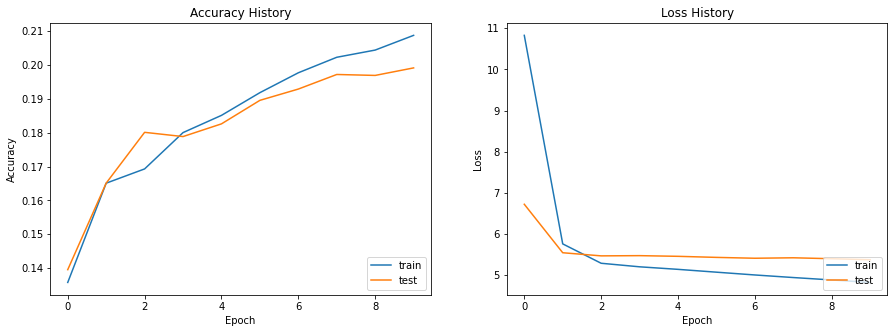

In [ ]:
from keras import layers
from keras.regularizers import l2
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,dropout=0.2,name="RNN_Layer_1", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_2", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_3",kernel_regularizer=l2(0.01))(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)

model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=10, verbose=2, 
                  batch_size=512,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend(loc="lower right")

plt.show()

2703
Epoch 1/10
43/43 - 29s - loss: 10.8629 - accuracy: 0.1323 - val_loss: 6.7765 - val_accuracy: 0.1393 - 29s/epoch - 686ms/step
Epoch 2/10
43/43 - 12s - loss: 5.7789 - accuracy: 0.1661 - val_loss: 5.5449 - val_accuracy: 0.1651 - 12s/epoch - 274ms/step
Epoch 3/10
43/43 - 7s - loss: 5.2876 - accuracy: 0.1741 - val_loss: 5.5014 - val_accuracy: 0.1790 - 7s/epoch - 163ms/step
Epoch 4/10
43/43 - 11s - loss: 5.2097 - accuracy: 0.1823 - val_loss: 5.4930 - val_accuracy: 0.1801 - 11s/epoch - 252ms/step
Epoch 5/10
43/43 - 10s - loss: 5.1544 - accuracy: 0.1841 - val_loss: 5.4579 - val_accuracy: 0.1819 - 10s/epoch - 237ms/step
Epoch 6/10
43/43 - 12s - loss: 5.0910 - accuracy: 0.1889 - val_loss: 5.4387 - val_accuracy: 0.1856 - 12s/epoch - 283ms/step
Epoch 7/10
43/43 - 10s - loss: 5.0235 - accuracy: 0.1957 - val_loss: 5.4274 - val_accuracy: 0.1945 - 10s/epoch - 242ms/step
Epoch 8/10
43/43 - 7s - loss: 4.9544 - accuracy: 0.2020 - val_loss: 5.4039 - val_accuracy: 0.1919 - 7s/epoch - 160ms/step
Epoch 

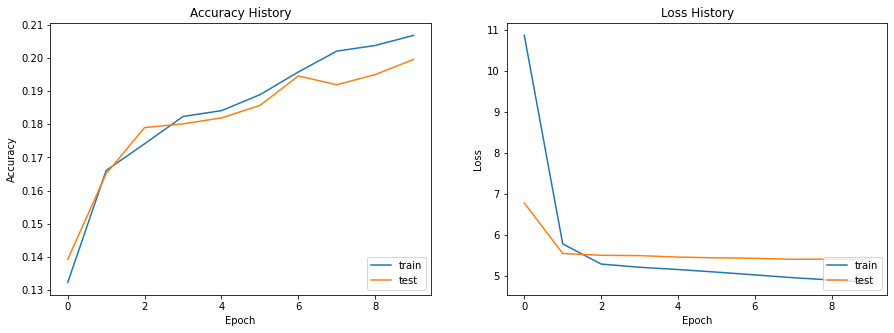

In [ ]:
from keras import layers
from keras.regularizers import l2
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="RNN_Layer_1", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_2", return_sequences=True,kernel_regularizer=l2(0.01))(ftxt)
ftxt = layers.LSTM(256,dropout=0.2,name="RNN_Layer_3",kernel_regularizer=l2(0.01))(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)

model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=10, verbose=2, 
                  batch_size=512,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))

plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend(loc="lower right")

plt.show()

2703
Epoch 1/10
43/43 - 25s - loss: 6.6302 - accuracy: 0.1336 - val_loss: 5.7474 - val_accuracy: 0.1455 - 25s/epoch - 586ms/step
Epoch 2/10
43/43 - 7s - loss: 5.4209 - accuracy: 0.1699 - val_loss: 5.4616 - val_accuracy: 0.1790 - 7s/epoch - 163ms/step
Epoch 3/10
43/43 - 7s - loss: 5.2387 - accuracy: 0.1812 - val_loss: 5.4127 - val_accuracy: 0.1804 - 7s/epoch - 161ms/step
Epoch 4/10
43/43 - 7s - loss: 5.1199 - accuracy: 0.1838 - val_loss: 5.3585 - val_accuracy: 0.1834 - 7s/epoch - 163ms/step
Epoch 5/10
43/43 - 7s - loss: 4.9865 - accuracy: 0.1886 - val_loss: 5.2860 - val_accuracy: 0.1879 - 7s/epoch - 165ms/step
Epoch 6/10
43/43 - 7s - loss: 4.8566 - accuracy: 0.2044 - val_loss: 5.2304 - val_accuracy: 0.2011 - 7s/epoch - 160ms/step
Epoch 7/10
43/43 - 15s - loss: 4.7428 - accuracy: 0.2157 - val_loss: 5.2167 - val_accuracy: 0.2105 - 15s/epoch - 350ms/step
Epoch 8/10
43/43 - 16s - loss: 4.6539 - accuracy: 0.2231 - val_loss: 5.2081 - val_accuracy: 0.2162 - 16s/epoch - 367ms/step
Epoch 9/10
43

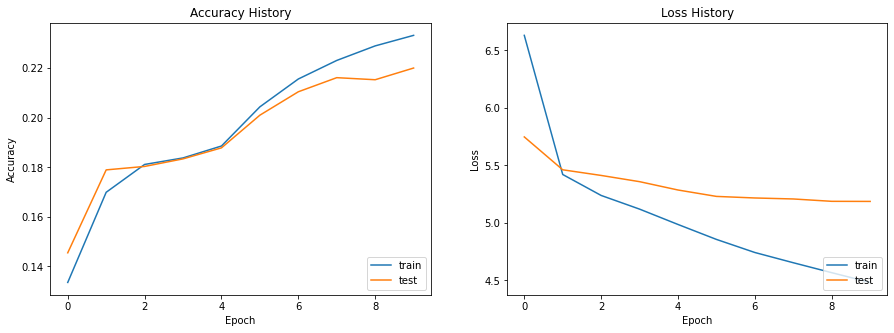

In [ ]:
from keras import layers
from keras.regularizers import l2
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="RNN_Layer_1", return_sequences=True)(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_2", return_sequences=True)(ftxt)
ftxt = layers.LSTM(256,name="RNN_Layer_3")(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)

model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_NoL2 = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=10, verbose=2, 
                  batch_size=512,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))

plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(hist_NoL2.history['accuracy'], label='train')
plt.plot(hist_NoL2.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(hist_NoL2.history['loss'], label='train')
plt.plot(hist_NoL2.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend(loc="lower right")

plt.show()

Hyperparameter Testing

In [ ]:
'''import keras_tuner as ktt
def build_model(hp):
    dim_embedding = 64

    input_image = layers.Input(shape=(Ximage_train.shape[1],))
    fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
    ## sequence model
    input_txt = layers.Input(shape=(maxlen,))
    ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
    ftxt = layers.LSTM(256,name="RNN_Layer_1", return_sequences=True)(ftxt)
    ftxt = layers.LSTM(256,name="RNN_Layer_2", return_sequences=True)(ftxt)
    ftxt = layers.LSTM(256,name="RNN_Layer_3")(ftxt)
    ## combined model for decoder
    decoder = layers.add([ftxt,fimage])
    decoder = layers.Dense(256,activation='relu')(decoder)
    output = layers.Dense(vocab_size,activation='softmax')(decoder)

    model = models.Model(inputs=[input_image, input_txt],outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model
'''

'import keras_tuner as ktt\ndef build_model(hp):\n    dim_embedding = 64\n\n    input_image = layers.Input(shape=(Ximage_train.shape[1],))\n    fimage = layers.Dense(256,activation=\'relu\',name="ImageFeature")(input_image)\n    ## sequence model\n    input_txt = layers.Input(shape=(maxlen,))\n    ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)\n    ftxt = layers.LSTM(256,name="RNN_Layer_1", return_sequences=True)(ftxt)\n    ftxt = layers.LSTM(256,name="RNN_Layer_2", return_sequences=True)(ftxt)\n    ftxt = layers.LSTM(256,name="RNN_Layer_3")(ftxt)\n    ## combined model for decoder\n    decoder = layers.add([ftxt,fimage])\n    decoder = layers.Dense(256,activation=\'relu\')(decoder)\n    output = layers.Dense(vocab_size,activation=\'softmax\')(decoder)\n\n    model = models.Model(inputs=[input_image, input_txt],outputs=output)\n    model.compile(\n        optimizer=tf.keras.optimizers.Adam(\n            hp.Choice(\'learning_rate\', [1e-2, 1e-3, 1e-4])),\n 

In [ ]:
'''
tuner = ktt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=2,
    directory='proje',
    project_name='DL_Assignment')
'''


"\ntuner = ktt.RandomSearch(\n    build_model,\n    objective='val_accuracy',\n    max_trials=2,\n    executions_per_trial=2,\n    directory='proje',\n    project_name='DL_Assignment')\n"

In [ ]:
#tuner.search_space_summary()

In [ ]:
'''
tuner.search([Ximage_train, Xtext_train], ytext_train, 
                  epochs=10, verbose=2,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))
                  '''

'\ntuner.search([Ximage_train, Xtext_train], ytext_train, \n                  epochs=10, verbose=2,\n                  validation_data=([Ximage_val, Xtext_val], ytext_val))\n                  '

In [ ]:
#tuner.results_summary()

## **Q2) 2.5 Marks**

Let us define a sequence parity function as a function that takes in a sequence of binary inputs and returns a sequence indicating the number of 0’s in the input so far; specifically, if at time t the 0’s in the input so far is odd it returns 1, and 0 if it is even. For example, given input sequence [0, 1, 0, 1, 1, 0], the parity sequence is [1, 1, 0, 0, 0, 1]. 

 

Implement the minimal vanilla recurrent neural network to learn the parity function. Explain your rationale using a state transition diagram and parameters of the network.

**Objective**:

To define a sequence parity function as a function that takes in a sequence of binary inputs and returns a sequence indicating the number of 0’s in the input so far; specifically, if at time t the 0’s in the input so far is odd it returns 1, and 0 if it is even. For example, given input sequence [0, 1, 0, 1, 1, 0], the parity sequence is [1, 1, 0, 0, 0, 1].

Implement the minimal vanilla recurrent neural network to learn the parity function.

### **1. Sequence Parity Function**
Based on the given example, a parity generator function "**par_gen**" is written to generate a random sequence of binary inputs. This sequence is "**in_seq**" and it given as input to the perceptron of the RNN implementation.

The parity generator function also generates the expected output. This output sequence is called "**out_seq**". This sequence is used to validate the output of the implemented Vanilla RNN.






In [1]:
def par_gen(k,size=1000000):
    assert size >= k
    X = np.array(np.random.choice(2, size=(size,)))
    Y=[0]*size
    sumk = 0
    for i in range(size):
        if X[i] == 0 :
            sumk = sumk + 1
            sumk = sumk%2
            Y[i] = sumk
        else :
            Y[i] = sumk
    return X, np.array(Y)

###**2. Vanilla RNN Implementation**
To implement the vanilla RNN, it is observed that the output sequence is the XNOR output of the input bit at time 't' and the previous XNOR output bit at time 't-1'.



The **XNOR** logic can be realised as below:

**XNOR(x1,x2) = OR(NOT(OR(x1,x2)), OR(x1,x2))**



Here, 

**x1** is the taken as a 1-bit input from the "in_seq" generated by the parity generator.

**x2** is the previous XNOR output from the perceptron function. For the first bit, this value is assumed to be '**0**'



### **Below is the State Diagram of the XNOR logic implemented.**

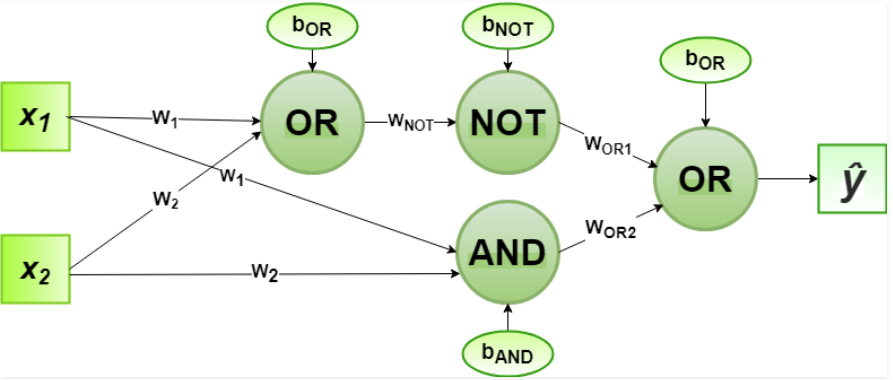

### **Python Code to Implement Vanilla RNN**
In the below code, 

A "**percepton model**" function is defined that takes in input, weights and bias values and returns the perceptron output.

Individual logic functions of **AND, OR and NOT** are defined that call the perceptron model function by passing appropriate weights and bias values

The **XNOR** logic function is finally defined that in turn calls the AND, OR and NOT logic functions to realise the NOR operation and provide final output of the RNN model.

In [2]:
# importing Python library
import numpy as np
  
# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0
  
# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y
  
# NOT Logic Function
# wNOT = -1, bNOT = 0.5
def NOT_logicFunction(x):
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT)
  
# AND Logic Function
# w1 = 1, w2 = 1, bAND = -1.5
def AND_logicFunction(x):
    w = np.array([1, 1])
    bAND = -1.5
    return perceptronModel(x, w, bAND)
  
# OR Logic Function
# here w1 = wOR1 = 1, 
# w2 = wOR2 = 1, bOR = -0.5
def OR_logicFunction(x):
    w = np.array([1, 1])
    bOR = -0.5
    return perceptronModel(x, w, bOR)
  
# XNOR Logic Function
# with AND, OR and NOT  
# function calls in sequence
def XNOR_logicFunction(x):
    y1 = OR_logicFunction(x)
    y2 = AND_logicFunction(x)
    y3 = NOT_logicFunction(y1)
    final_x = np.array([y2, y3])
    finalOutput = OR_logicFunction(final_x)
    return finalOutput
  


### **Running the RNN using the input sequence generator from sequence parity generator function**

In [3]:
in_seq,out_seq = par_gen(6,10)
in_seq = in_seq.tolist()
out_seq = out_seq.tolist()
gen_out_seq=[]
j=0
for i in in_seq :
  while (j<len(in_seq)):
    a = in_seq[j]
    if j==0:
      b = 0
    else : 
      b = gen_out_seq[j-1]
    j+=1
    test_in = np.array([a, b])
    gen_out_seq.append(XNOR_logicFunction(test_in))
print("Given Input sequence for sequence parity generator generated from function:", in_seq)
print("Expected Output sequence of sequence parity generator generated from function:", out_seq)
print("Output generated from the implemented Vanilla RNN using XNOR logic in perceptrons:", gen_out_seq)

Given Input sequence for sequence parity generator generated from function: [1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
Expected Output sequence of sequence parity generator generated from function: [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
Output generated from the implemented Vanilla RNN using XNOR logic in perceptrons: [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]


**As can be seen from the above output, the expected output generated from the sequence parity function and the implemented vanilla RNN model are exactly the same.**